<a href="https://colab.research.google.com/github/xesmaze/cpsc541-fall2024/blob/main/lectures/ImputationWorkflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Step 1 . Data Exploration**

First, load the dataset and examine the missing data patterns, and the correlation structure.
We will use automobile data set for this exercise
You can download the data from https://www.kaggle.com/datasets/toramky/automobile-dataset?resource=download

and upload to your colab instance.

In [ ]:
! pip install ydata_profiling

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import os
from scipy import stats
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures




# Load your dataset (replace with actual data source)
df = pd.read_csv('Automobile_data.csv')
df.head()

# df = pd.read_csv('your_dataset.csv')

# Check for missing data
#print(df.isnull().sum())

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
df.shape

(205, 26)

In [ ]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [ ]:
df.dtypes

,0
symboling,int64
normalized-losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Missing data in this dataset is represented by the symbol ```?```, you will need to first replace this symbol with NaN values (which are recognized as missing values by pandas and most imputation techniques).



In [ ]:
# Replace '?' with NaN
df.replace("?",np.nan,inplace =True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
# sum of null values in every columns.
df.isnull().sum()

,0
symboling,0
normalized-losses,41
make,0
fuel-type,0
aspiration,0
num-of-doors,2
body-style,0
drive-wheels,0
engine-location,0
wheel-base,0


In [ ]:
# no of duplicated rows in data frames
df.duplicated().value_counts()

,count
False,205


**Step 2. Explore missing data**
- Heatmap is the most suitable visualization for this.

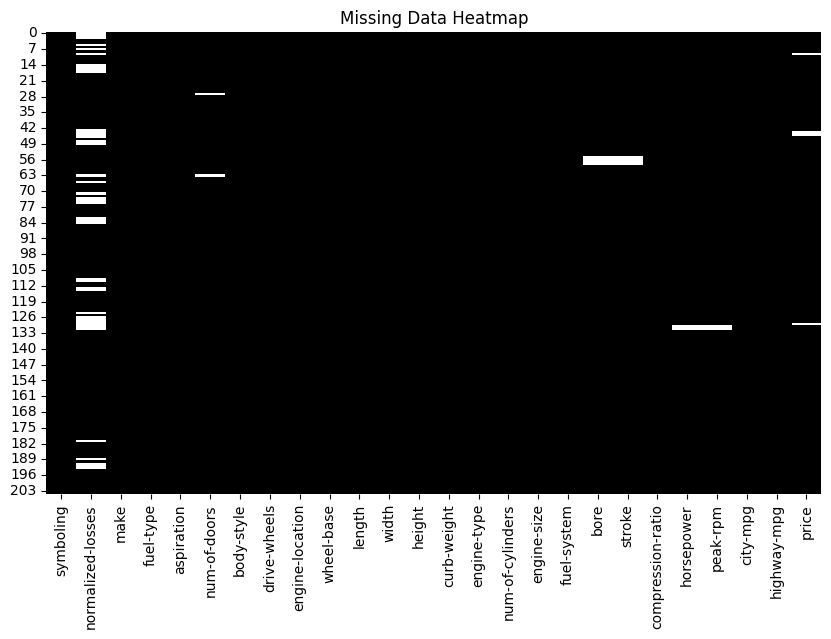

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='cubehelix')
plt.title("Missing Data Heatmap")
plt.show()


```"num-of-doors","normalized-losses","bore","stroke","horsepower","peak-rpm","price"``` columns have missing values.

We start by replacing the **missing values by mean value for all variable except "num-of-doors"**. This variable missing values will be replace by **most frequency** value.

In [ ]:
#Count the unique values in num-of-doors
Counter(df["num-of-doors"])

Counter({'two': 89, 'four': 114, nan: 2})

We will try two different imputations- if you run the next cell ommit the cell that follows.

**Mean Imputation**

In [ ]:
miss_col= ["normalized-losses","bore","stroke","horsepower","peak-rpm","price"]
for col in miss_col:
    df[col].replace(np.nan,df[col].astype("float").mean(axis=0),inplace=True)

df["num-of-doors"].replace(np.nan,df["num-of-doors"].value_counts().idxmax(),inplace=True)
df.head().T

,0,1,2,3,4
symboling,3,3,1,2,2
normalized-losses,122.0,122.0,122.0,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num-of-doors,two,two,two,four,four
body-style,convertible,convertible,hatchback,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd
engine-location,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4


**Numerical Data Imputation with MICE**
- You can use Iterative Imputer (MICE) instead of the above mean/median imputation depending on the variable types.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

# Select numerical columns for imputation
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Use IterativeImputer (MICE) for numerical columns
imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=0)
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Check if the imputation was successful
print(df.isnull().sum())  # This should show fewer or no missing values for numerical columns


symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


**Categorical Data Imputation**
- For categorical data (such as car makes, fuel types, etc.), you can impute missing values using the most frequent category (mode).

In [ ]:
# Impute categorical columns with the most frequent value (mode)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check again for missing values
print(df.isnull().sum())  # This should show 0 missing values across the dataset

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


Now we can update the dtypes...

In [ ]:
print("Data Types of Variables \n",df.dtypes)

Data Types of Variables 
 symboling            float64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-type           object
num-of-cylinders      object
engine-size          float64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg             float64
highway-mpg          float64
price                 object
dtype: object


In [ ]:
# correct the data format.
df[["normalized-losses","bore","stroke","horsepower","peak-rpm","price"]]=df[["normalized-losses","bore","stroke","horsepower","peak-rpm","price"]].astype("float")
df.dtypes

,0
symboling,float64
normalized-losses,float64
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


**Validate the Imputation**
- After imputation, you should check whether the relationships and distribution of variables are preserved.

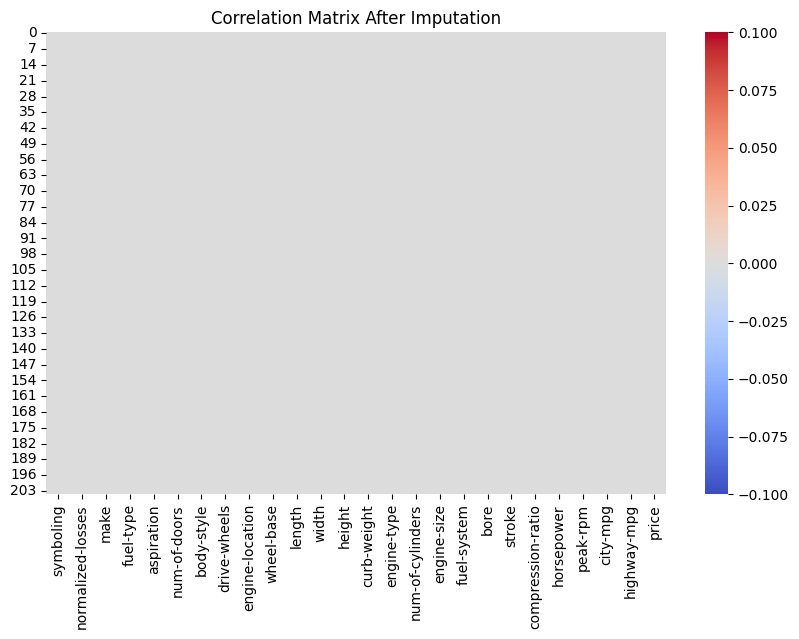

In [ ]:
#Try the heatmap again
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='coolwarm')
plt.title("Data Matrix After Imputation")
plt.show()

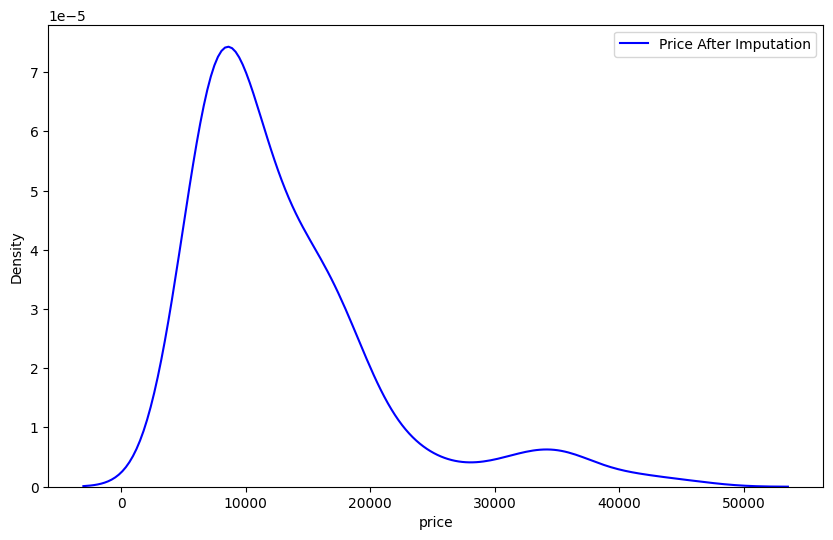

In [ ]:
# Compare distributions before and after imputation for key variables
plt.figure(figsize=(10, 6))
sns.kdeplot(df['price'], label="Price After Imputation", color="blue")
plt.legend()
plt.show()


**This is only after- how do we find the before?**

Better yet - there is a reporting tool distributed as a library that will generate a full report for your analysis and imputation that can be used for this https://docs.profiling.ydata.ai/latest/

Lets generate and browse this report...

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report")
profile.to_file("report_automobile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]